## Libraries

Let's load some libraries. The `datetime` module supplies classes for **manipulating dates and times** and comes with the standard Python library.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

## Dataset

Let's consider a dataset with 3 variables:

* **date**
* **temperature**: the first series to display. Ranges from 0 to 10.
* **price**: the second series to display. Ranges from 20 to 120.

In [3]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(1234)

# timedelta(i) adds "i" days to the 1st of January of 2019
date = [datetime(2019, 1, 1) + timedelta(i) for i in range(100)]
temperature = np.arange(100) ** 2.5 / 10000 + rng.uniform(size=100) 
price = np.arange(120, 20, -1) ** 1.5 / 10 + rng.uniform(size=100)

## 2 simple line charts

One could easily build 2 line charts to study the evolution of those 2 series using the code below.

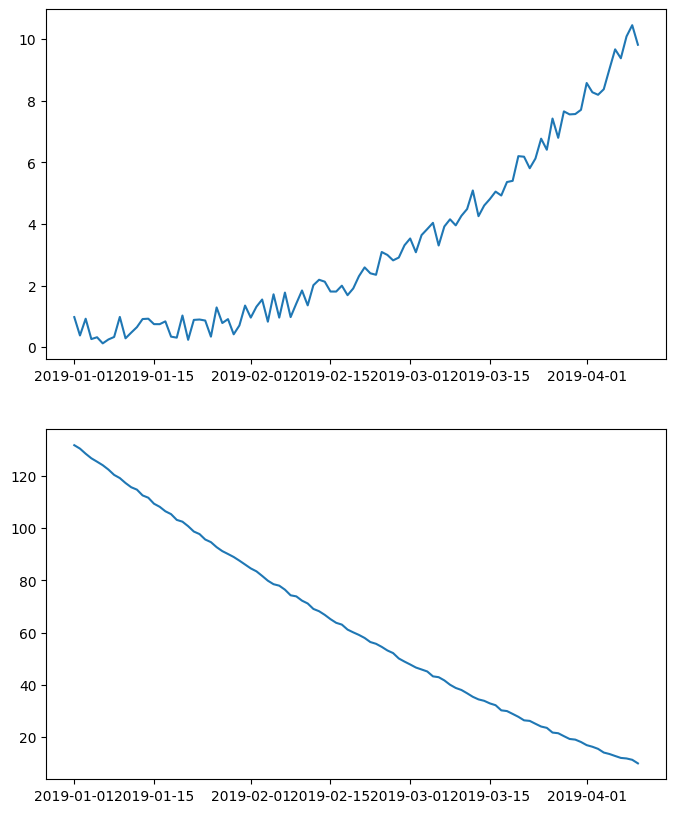

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

axes[0].plot(date, temperature)
axes[1].plot(date, price);

But even if [strongly unadvised](https://www.data-to-viz.com/caveats.html), one sometimes wants to display **both series on the same chart**, thus needing a second Y axis.

## Create a new twin Axis sharing the x axis with `ax.twinx()`: the idea

The first axis has a method (or function) that **allows to create a new axis** sharing the same x axis. This is done by calling `ax.twinx()`.

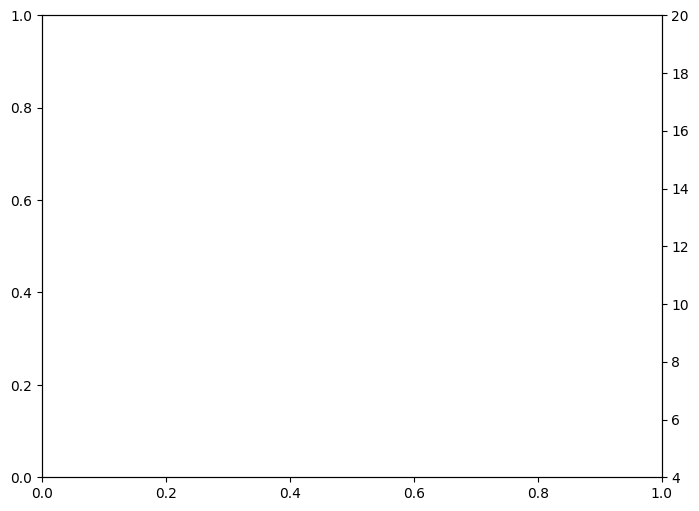

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylim(4, 20)

plt.show()

As can be seen above, the Y axis on the left goes from 0 to 1, while the Y axis on the right goes from 4 to 20. These limits are adjusted automatically when we pass data. 

Note that since both Y axes are independent, you can easily set any custom limit on the secondary Y axis.

## Show 2 series on the same line chart thanks to `ax.twinx()`

`ax.twinx()` returns an Axis instance that can be used just as any other Matplotlib Axis. The only particularity of this new Axis is that it **shares the horizontal axis** with the first one.

*Keep in mind that this type of chart can be misleading, giving the impressions that both series are on the same scale, which is not the case.*

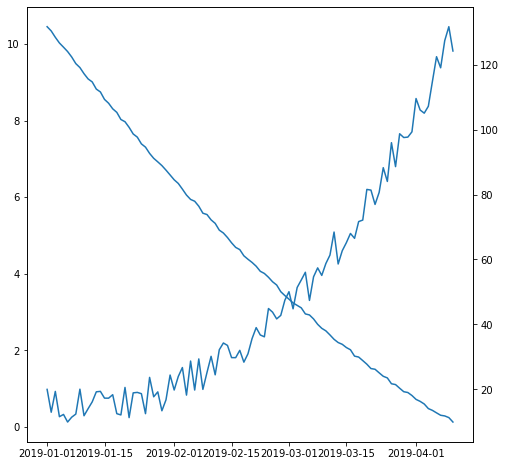

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(date, temperature)
ax2.plot(date, price);

## Dual Y axis customization with Matplotlib

Let's add some details to make the chart look better:

* Use **distinctive colors** for lines and labels
* Make lines **thicker**
* Add axis labels
* Add title
* Format date labels on the horizontal axis.

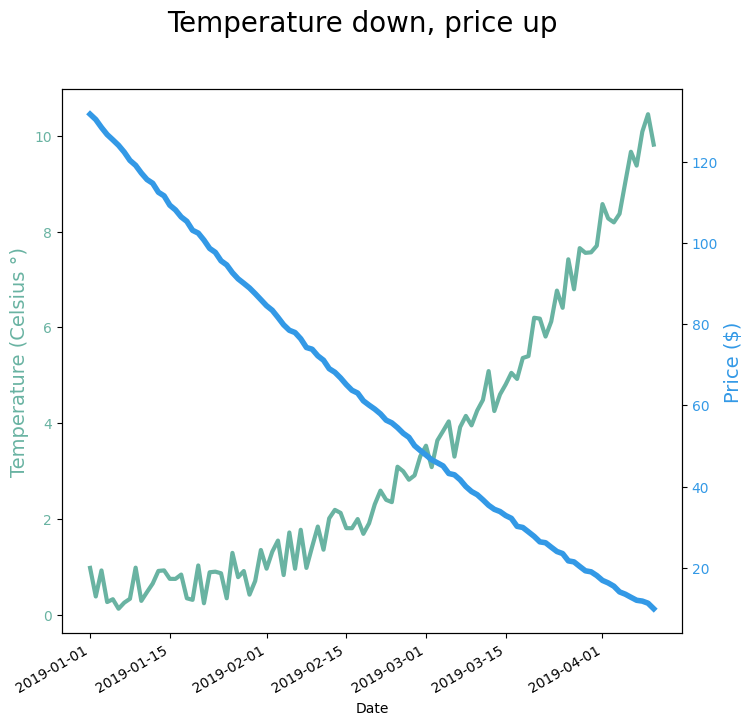

In [9]:
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(date, temperature, color=COLOR_TEMPERATURE, lw=3)
ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.suptitle("Temperature down, price up", fontsize=20)
fig.autofmt_xdate()

plt.show()

## Barplot with overlapping line chart

It's also possible to use the same tricks with **other types of plots**.

Here is an example displaying a line chart on top of a barplot.

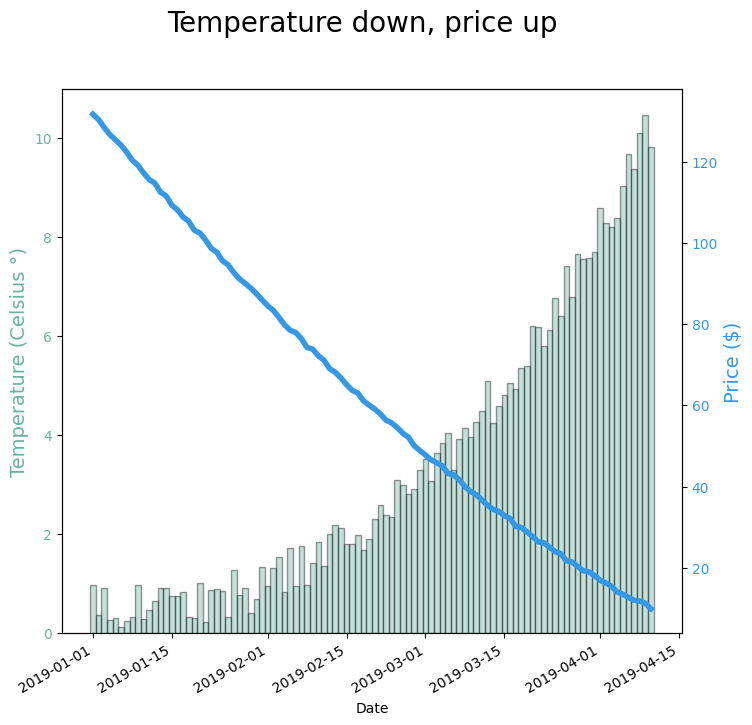

In [10]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.bar(date, temperature, color=COLOR_TEMPERATURE, edgecolor="black", alpha=0.4, width=1.0)
ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.autofmt_xdate()
fig.suptitle("Temperature down, price up", fontsize=20)

plt.show()

## Going further

This post explains how to use a dual axis with [matplotlib](https://python-graph-gallery.com/matplotlib/). 

You might be interested in how to [customize a multiple line charts](https://python-graph-gallery.com/123-highlight-a-line-in-line-plot/) and how to [customize title](https://python-graph-gallery.com//190-custom-matplotlib-title/).